<a href="https://www.kaggle.com/yassineboukhari/ml-project-heart-disease?scriptVersionId=87819711" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **HEART DISEASE** 

## **About Heart Disease**

> Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.

> Our objective will be to create suitable machine learning technique which classify the heart disease more accurately, which can be helpful to the health organisation as well as patients to prevent heart diseases cas 

## **About the Data set**
> This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.

> **Attribute Information**
> * Age (age in years)
> * Sex (1 = male; 0 = female)
> * CP (chest pain type)
> * TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
> * CHOL (serum cholestoral in mg/dl)
> * FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
> * RESTECH (resting electrocardiographic results)
> * THALACH (maximum heart rate achieved)
> * EXANG (exercise induced angina (1 = yes; 0 = no))
> * OLDPEAK (ST depression induced by exercise relative to rest)
> * SLOPE (the slope of the peak exercise ST segment)
> * CA (number of major vessels (0-3) colored by flourosopy)
> * THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
> * TARGET (1 or 0)

## Table of Contents
1) Import Packages

2) EDA

3) Preparing ML models

4) Models evaluation

5) Ensembling

6) Conclusion

## Packages Required

In [1]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

## **Pre-process**

In [2]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#Class to look analyse to architerture of our dataset's features
class sr_value:
    def __init__(self,data):
        self.dt=data
        
    def pos_value(self):
        for i in self.dt.columns:
            print(f'* la colonne {i} a comme valeur possible{self.dt[i].unique()}')
            print('\n')
            
    def ct_ord_value(self,ord_val):
        for i in ord_val:
            print(f' La variable ordinale {i} a comme distibution de ces valeurs le schéma suivant :\n {self.dt[i].value_counts()}')
            print('\n')
            
    def ct_value(self):
        for i in self.dt.columns:
            print(f'* La colonne {i} a comme valeurs possibles : {len(self.dt[i].unique())}')
            print('\n')


In [5]:
# On renomme nos features par le nom au complet
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','nb_vessels','thal','target']

In [6]:
data_architecture=sr_value(data)
#Regardons le nombre de valeurs prises de nos features
data_architecture.ct_value()

* La colonne age a comme valeurs possibles : 41


* La colonne sex a comme valeurs possibles : 2


* La colonne chest_pain_type a comme valeurs possibles : 4


* La colonne resting_blood_pressure a comme valeurs possibles : 49


* La colonne cholesterol a comme valeurs possibles : 152


* La colonne fasting_blood_sugar a comme valeurs possibles : 2


* La colonne rest_ecg a comme valeurs possibles : 3


* La colonne max_heart_rate_achieved a comme valeurs possibles : 91


* La colonne exercise_induced_angina a comme valeurs possibles : 2


* La colonne st_depression a comme valeurs possibles : 40


* La colonne st_slope a comme valeurs possibles : 3


* La colonne nb_vessels a comme valeurs possibles : 5


* La colonne thal a comme valeurs possibles : 4


* La colonne target a comme valeurs possibles : 2




* Après visualisation des nombres de valeurs que prennent nos features, on s'intéresse par la suite à voir la distribution des variables dôtées d'un caractère ordinal que numérique  :

> **chest_pain_type**

> **rest_ecg**

> **st_slope**

> **thal**

In [7]:
cat_values=['chest_pain_type','rest_ecg','st_slope','thal']
data_architecture.ct_ord_value(cat_values)

 La variable ordinale chest_pain_type a comme distibution de ces valeurs le schéma suivant :
 0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64


 La variable ordinale rest_ecg a comme distibution de ces valeurs le schéma suivant :
 1    152
0    147
2      4
Name: rest_ecg, dtype: int64


 La variable ordinale st_slope a comme distibution de ces valeurs le schéma suivant :
 2    142
1    140
0     21
Name: st_slope, dtype: int64


 La variable ordinale thal a comme distibution de ces valeurs le schéma suivant :
 2    166
3    117
1     18
0      2
Name: thal, dtype: int64




Dans ce qui va suivre on s'intéressera à la partie cleaning de notre dataset qui a pour étapes pour but :

>  * Détecter et enlever les valeurs redondantes

>  * Voir si notre table de données contient des données manquantes et appliquer différentes méthodes pour combler ce vide

> * Vérifier si on est dans le cas de données déséquilibrées

> * Détecter si nos données contiennent des outliers chose qui pourra faire tendre nos prédiction à subir un Overfit

Après cela nous pourrons passer à la partie data visualisation. 

## **Exploratory Data Analysis**

### Détection de données manquantes 

Regardons si nous avons des données manquantes

In [8]:
data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
nb_vessels                 0
thal                       0
target                     0
dtype: int64

* Comme on peut le voir notre base de données ne contient aucune données manquantes ce qui est en soit bon signe pour la suite de l'étude. Passons maintenant à l'exploration analytique de notre dataset.


### **Descriptive statistics**

In [9]:
data.shape

(303, 14)

* Notre dataset contient 303 bilan muni de 13 features et 1 variable target permettant de données chances d'un arrêt cardiaque. Reagrdons de plus près les propriétés statistiques de notre Dataset.


> Regardons en premier la distribution statistiques de nos données numériques

In [10]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nb_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Ordinal features pre-processing et visualisation


>  Passons maintenant aux données de type catégorielles & ordinales



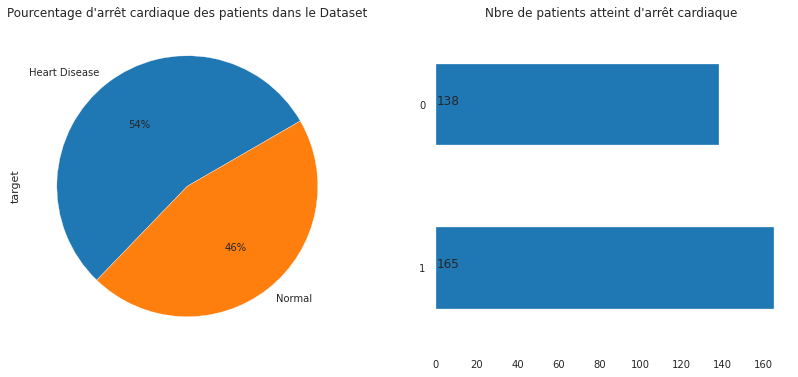

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

#Pie Plot
ax1 = data['target'].value_counts().plot.pie( x="Heart disease" ,y ='nbre.de patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 30,ax=ax1);
ax1.set(title = "Pourcentage d'arrêt cardiaque des patients dans le Dataset")

#Countplot
ax2 = data["target"].value_counts().plot(kind="barh" ,ax =ax2)

for i,j in enumerate(data["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = "Nbre de patients atteint d'arrêt cardiaque ")
plt.show()

Passons maintenant à la distribution de nos données conditionnée par **l'âge**

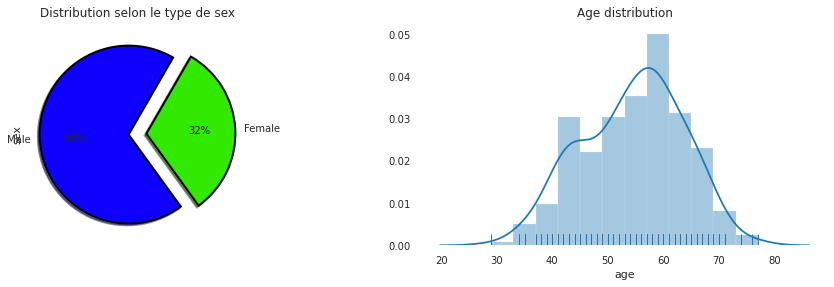

In [12]:
#Pie plot

plt.figure(figsize=(16,9))
plt.subplot(221)
data["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution selon le type de sex")

#Distribution age

plt.subplot(222)
ax= sns.distplot(data['age'], rug=True)
plt.title("Age distribution")
plt.show()

> Comme on peut le constater les hommes sont plus touchés par les arrêts cardiaques que les femmes, où la moyenne d'âge tourne vers les 60 ans. 

> Dans ce qui va suivre on s'intéresse à séparer les patients normaux et les patients atteints d'antécendants cardiaques.

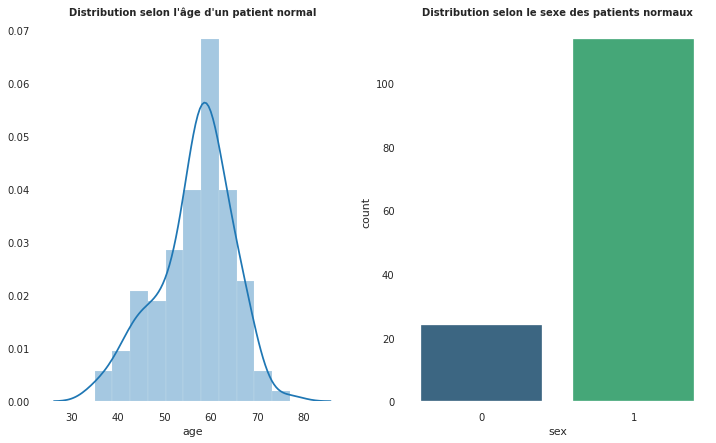

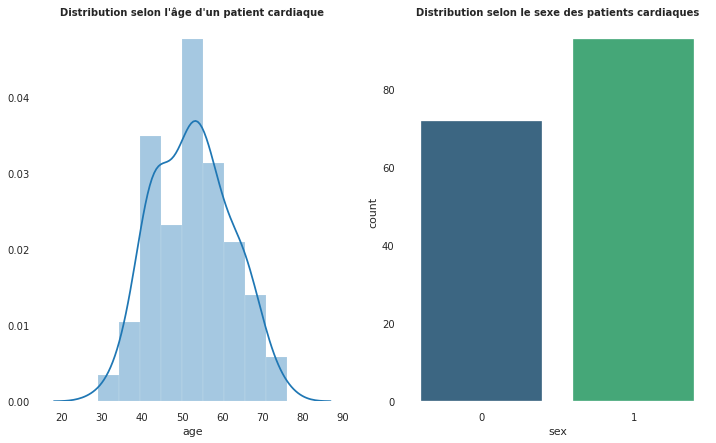

In [13]:
target_1=data[data['target']==1]
target_0=data[data['target']==0]

#Partie Visualisation

#Voyons la distribution selon l'âge des "patients normaux"
fig=plt.figure(figsize=(12,7))

#Cas des patients normaux (target=0)
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(target_0['age'])
plt.title("Distribution selon l'âge d'un patient normal",fontsize=10, weight='bold') 

#Gender distribution pour les "patients normaux"
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(target_0['sex'],palette='viridis')
plt.title("Distribution selon le sexe des patients normaux",fontsize=10,weight='bold')
plt.show()

#Distribution selon l'âge  pour les patients atteints d'arrêt cardiaque

fig=plt.figure(figsize=(12,7))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(target_1['age'])
plt.title("Distribution selon l'âge d'un patient cardiaque",fontsize=10, weight='bold') 

#Gender distribution pour les patients cardiaques

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(target_1['sex'],palette='viridis')
plt.title("Distribution selon le sexe des patients cardiaques",fontsize=10,weight='bold')
plt.show()

> Comme vu plus haut la moyenne des décès par arrêt cardiaque est fixée vers les environs de 58 ou 60 ans et on a une supériorité des décès plus distingué chez le sexe masculin. Voyons maintenant l'impact selon la variable **"Chest pain"** dans le cas de patients normaux et cardiaques.


In [14]:
def ord_plot(data,ordinal_feat):
    
    taget_0=data[data["target"]==0]
    taget_1=data[data["target"]==1]
        
    fig=plt.figure(figsize=(9,7))

    #Patients normaux
    print(f'----------------------{ordinal_feat}----------------------')
    ax=plt.subplot2grid((1,2),(0,0))
    sns.countplot(target_0[ordinal_feat],palette='viridis')
    plt.title('Effet rest ecg sur les patients normaux',fontsize=10,weight='bold')

    #patients Cardiaques
    print('\n')
    print('\n')
    ax=plt.subplot2grid((1,2),(0,1))
    sns.countplot(target_1[ordinal_feat],palette='viridis')
    plt.title('Effet du rest ecg sur les patients cardiaques',fontsize=10,weight='bold')
    plt.show()
    print("Regardons la différence de la distrubtion des classes plus explictement :")
    print('\n')
    plot_criteria=[ordinal_feat,'target']
    cm=sns.light_palette('red',as_cmap=True)
    ct=(round(pd.crosstab(data[plot_criteria[0]],data[plot_criteria[1]],normalize='columns') * 100,2)).style.background_gradient(cmap = cm)
    return(ct)

In [15]:
#Initialisation de la liste contenant nos ordinal_features
ordinal_feat=['chest_pain_type','rest_ecg','st_slope']

* Commeçons par la distribution de **Chest_pain_type**, regardons plus précisément les éléments les plus présents dans le cas de décès.


----------------------chest_pain_type----------------------






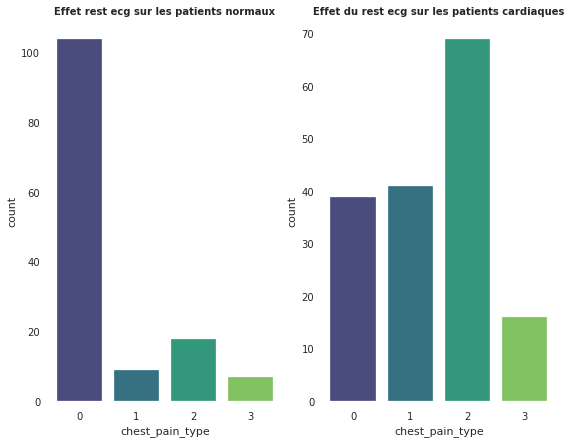

Regardons la différence de la distrubtion des classes plus explictement :




target,0,1
chest_pain_type,,
0,75.360000,23.640000
1,6.520000,24.850000
2,13.040000,41.820000
3,5.070000,9.700000


In [16]:
ord_plot(data,ordinal_feat[0])

*  Passons au critère **rest_ecg** 

----------------------rest_ecg----------------------






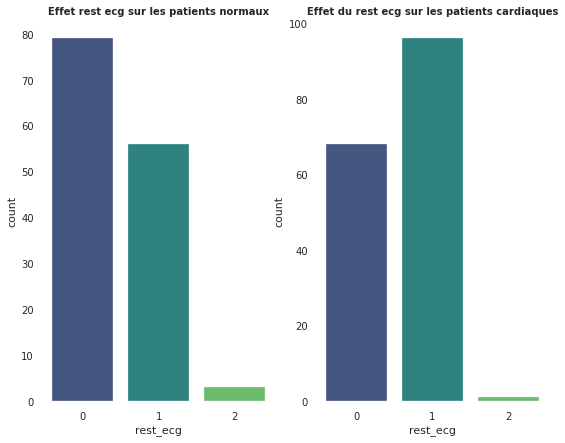

Regardons la différence de la distrubtion des classes plus explictement :




target,0,1
rest_ecg,,
0,57.250000,41.210000
1,40.580000,58.180000
2,2.170000,0.610000


In [17]:
ord_plot(data,ordinal_feat[1])

* maitenant regardons **st_slope**

----------------------st_slope----------------------






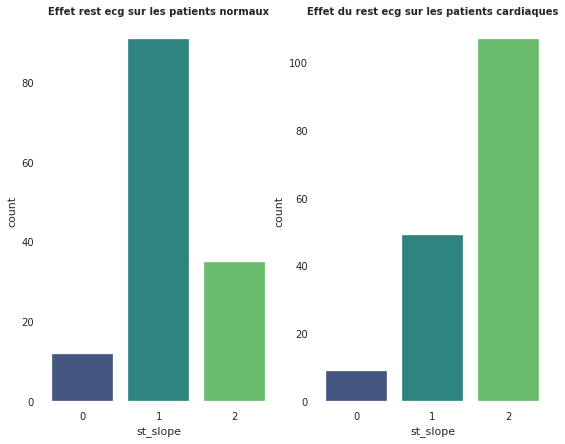

Regardons la différence de la distrubtion des classes plus explictement :




target,0,1
st_slope,,
0,8.700000,5.450000
1,65.940000,29.700000
2,25.360000,64.850000


In [18]:
ord_plot(data,ordinal_feat[2])

#### Numerical features preprocessing et visualisation 

> Passant maintenant à la distribution de nos valeurs numériques

In [19]:
class expl_analysis:
    def __init__(self,data):
        self.dt=data
    
    #Pair_plot selon 'target'
    def pplot(self,num_vars):
        plt.figure(figsize=(9,7))
        sns.pairplot(self.dt,hue='target',vars=num_vars,corner=True)
        
    #Scatter_plot of the distribution selon 'target'
    def scatplot(self,X,Y):
        plt.figure(figsize=(9,7))
        sns.scatterplot(x=X,y=Y,
                        hue='target',data=self.dt)
        
    #Plot pour detecter les outliers
    def outlier_plot(self,numeric_feat):
        plt.figure(figsize=(9,7))
        eda_hd=self.dt.reindex(columns = numeric_feat)
        for i in range(len(eda_hd.columns)):
            plt.subplot(3,3,i+1)
            sns.boxplot(eda_hd[eda_hd.columns[i]])
        plt.show()
        
    #Matrice de corrélation 
    def eda_cor(self,numeric_feat):
        eda_hd=self.dt.reindex(columns = numeric_feat)
        eda_corr=eda_hd.corr()
        plt.figure(figsize=(9,7))
        sns.heatmap(eda_corr,annot=True,cmap='mako')
        plt.title('Matrice de Corrélation')
        plt.show()
        

Commençons par regarder la distribution de nos numerical features jumelées deux à deux

<Figure size 648x504 with 0 Axes>

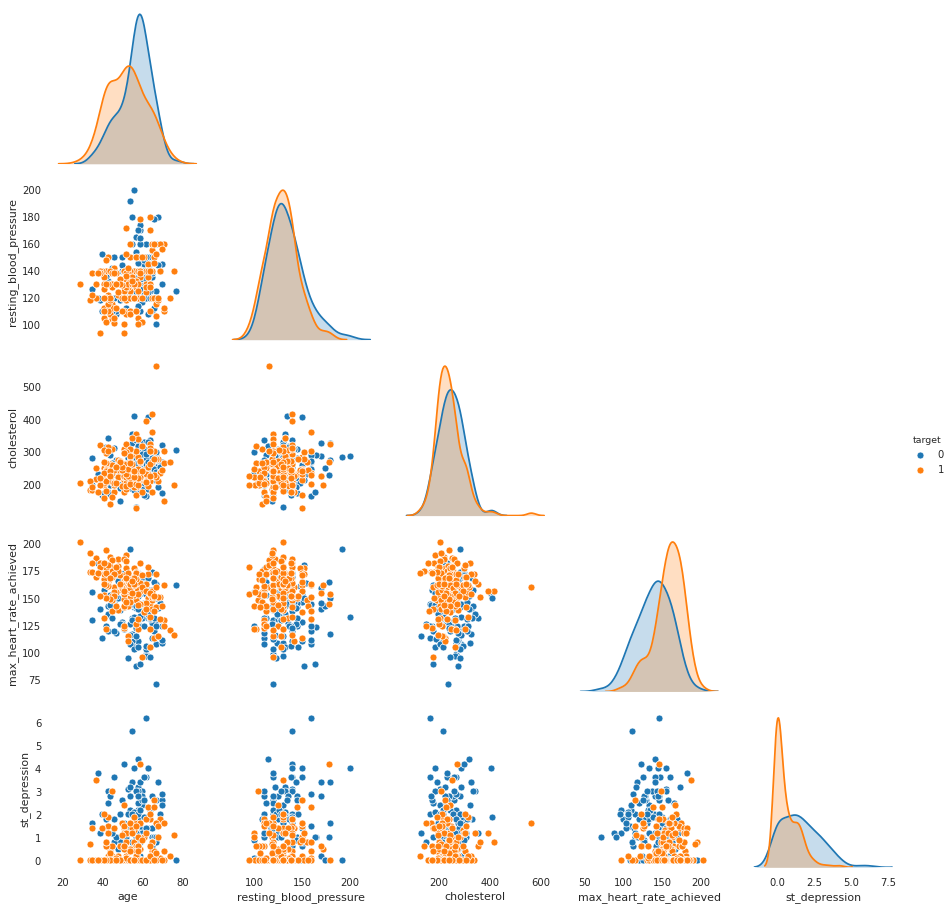

In [20]:
# num_vars=["age","resting_blood_pressure","cholesterol"]
numeric_feat=["age","resting_blood_pressure","cholesterol",
                      "max_heart_rate_achieved","st_depression"]
#Initialisation de la classe
plot_data=expl_analysis(data)

#Pair plot
plot_data.pplot(numeric_feat)

> Comme on peut le voir plus l'âge augmente plus nos chances d'avoir un arrêt cardiaque augmente, Regardons plus précisément l'une de nos distributions obtenues plus haut.

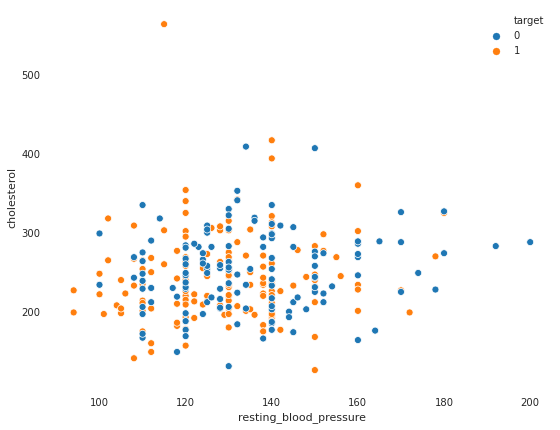

In [21]:
#Relation visuelle entre resting_blood_pressure et cholesterol 
X='resting_blood_pressure'
Y='cholesterol'
plot_data.scatplot(X,Y)

> Comme on l'a cité avant on est belle est bien en présence de quelques outliers comme le montre le plot ci-dessus avec des valeurs assez dispersées.

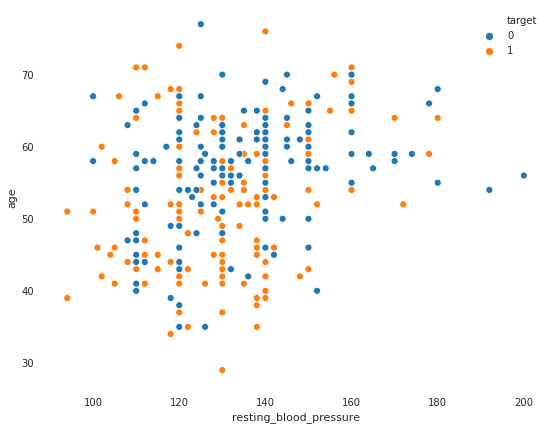

In [22]:
#Relation visuelle entre resting_blood_pressure et cholesterol 
X='resting_blood_pressure'
Y='age'
plot_data.scatplot(X,Y)

> Passons maintenant à l'étape de suppression d'outliers, on commence par sélectionner les valeurs de type numériques

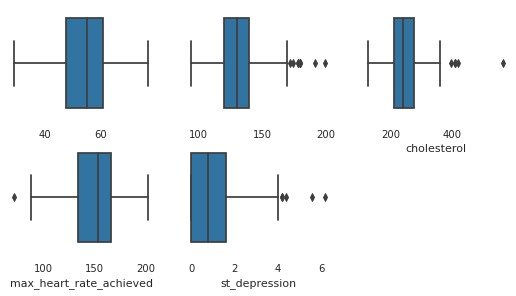

In [23]:
numeric_feat=["age","resting_blood_pressure","cholesterol",
                      "max_heart_rate_achieved","st_depression"]
plot_data.outlier_plot(numeric_feat)

> On remarque que notre base de données contient pas mal de outiliers, on verra par la suite une manière de fixer ce problème.

> Passons maintenant à la visualisation de la dépendance entre nos variables pour cela on fera appel la matrice de corrélation

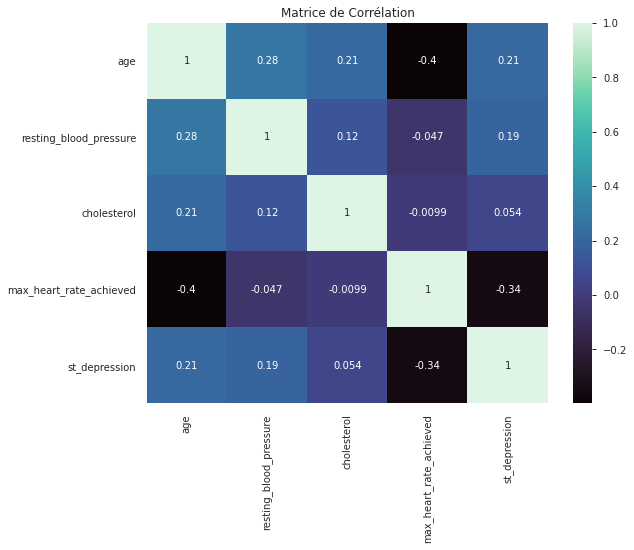

In [24]:
plot_data.eda_cor(numeric_feat)

* Passons maintenant à l'étape de suppression d'outliers, on commence par sélectionner les valeurs de type numériques


In [25]:
data_numeric = data[['age','resting_blood_pressure',
                 'cholesterol','max_heart_rate_achieved']]
data_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163


Calculons le z-score donnée $z=\frac{x-u}{\sigma}$ par afin d'effacer les outliers.

In [26]:
#model validation
import scipy as sp

z=np.abs(sp.stats.zscore(data_numeric))
print(z[:5])

[[0.9521966  0.76395577 0.25633371 0.01544279]
 [1.91531289 0.09273778 0.07219949 1.63347147]
 [1.47415758 0.09273778 0.81677269 0.97751389]
 [0.18017482 0.66386682 0.19835726 1.23989692]
 [0.29046364 0.66386682 2.08204965 0.58393935]]


> Afin de mieux filter nos données on se fixe un seuil à ne pas dépasser pour limiter les dépassements de données


In [27]:
threshold = 3
print(np.where(z > 3))

(array([ 28,  85, 220, 223, 246, 248, 272]), array([2, 2, 2, 1, 2, 1, 3]))


* En appliquons les changements on obtient notre base de données nettoyée

In [28]:
data_cl=data[(z<3).all(axis=1)]
print(f"Taille des données avant traitement des outliers : {data.shape}")
print(f"Taille des données après traitement des outliers :{data_cl.shape}")

Taille des données avant traitement des outliers : (303, 14)
Taille des données après traitement des outliers :(296, 14)


## **EDA Pandas_profiling**

A l'aide de la libraire pandas profiling on peut automatiser les étapes effectuer manuellement pour l'exploration de données sous un format **report** comme suit :

In [29]:
pp.ProfileReport(data)

## **Model prepration**

> Avant de passer maintenant à l'étape de prédiction commençons par transformer nos données catégoriques en fomat numériques à l'aide de la fonction **"getdummies()"** et séparer nos features de la variable à prédire **"Target"**

In [30]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'nb_vessels', 'thal', 'target'],
      dtype='object')

In [31]:
def onehotencode(df,column_dict):
    df=df.copy()
    for column, prefix in column_dict.items():
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

def preproces(data):
    data=data.copy()
    
    #One hot encode
    nominal_feat=['chest_pain_type','st_slope','thal']
    data=onehotencode(data,dict(zip(nominal_feat,['CP','SL','TH'])))
    
    #Split nos données
    y=data['target'].copy()
    X=data.drop('target',axis=1).copy()
    
    return X,y
    
#Scale X (train et test)
def scaling(data,scaler):
    num_feat=['age','resting_blood_pressure','cholesterol',
              'max_heart_rate_achieved','st_depression']
    data[num_feat] = scaler.fit_transform(data[num_feat])
    return data

In [32]:
X_cl,y_cl=preproces(data_cl)
X_cl.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,1,0


> Regardons maintenant la corrélation pour vérifier si une Réduction de dimension sera nécessaire pour le bon développement de notre modèle de prédiction

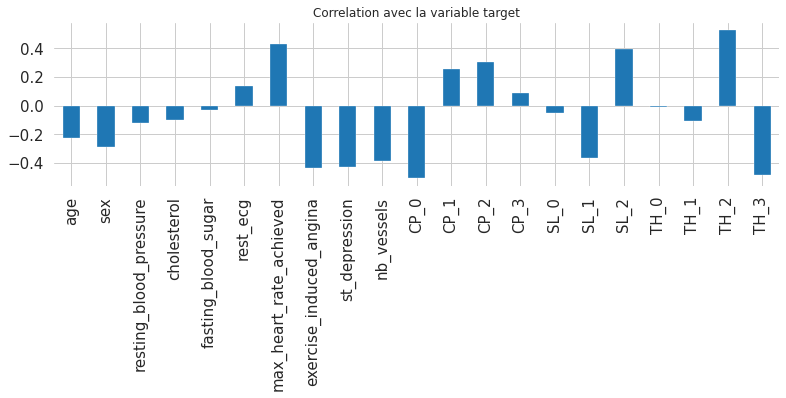

In [33]:
X_cl.corrwith(y_cl).plot.bar(figsize=(13,3),title='Correlation avec la variable target',
                       fontsize = 15,rot = 90, grid = True)

### Split Train-test

In [34]:
X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl, y_cl, test_size=0.20, random_state = 0)

In [35]:
print('la distribution de la variable target dans le train set :')
print(y_cl_train.value_counts())
print('la distribution de la variable target dans le test set :')
print(y_cl_test.value_counts())

la distribution de la variable target dans le train set :
1    134
0    102
Name: target, dtype: int64
la distribution de la variable target dans le test set :
0    31
1    29
Name: target, dtype: int64


> C'est bon nous sommes loin du cas de déséquilibre on peut maintenant initialiser l'étape de normalisation avant l'étape de classification

In [36]:
X_cl_train.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
137,62,1,128,208,1,0,140,0,0.0,0,...,1,0,0,0,0,1,0,0,1,0
139,64,1,128,263,0,1,105,1,0.2,1,...,0,0,0,0,1,0,0,0,0,1
178,43,1,120,177,0,0,120,1,2.5,0,...,0,0,0,0,1,0,0,0,0,1
221,55,1,140,217,0,1,111,1,5.6,0,...,0,0,0,1,0,0,0,0,0,1
20,59,1,135,234,0,1,161,0,0.5,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
#Normalisons l'ensemble d'apprentissage et de test 
scaler=StandardScaler()
X_cl_train=scaling(X_cl_train,scaler)
X_cl_test=scaling(X_cl_test,scaler)

> Voyons le changement que cela apporte sur nos données d'Apprentissage et Test

In [38]:
X_cl_train.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
137,0.825913,1,-0.188753,-0.795752,1,0,-0.415713,0,-0.869515,0,...,1,0,0,0,0,1,0,0,1,0
139,1.048546,1,-0.188753,0.414850,0,1,-1.993016,1,-0.699783,1,...,0,0,0,0,1,0,0,0,0,1
178,-1.289103,1,-0.661386,-1.478091,0,0,-1.317029,1,1.252130,0,...,0,0,0,0,1,0,0,0,0,1
221,0.046696,1,0.520197,-0.597653,0,1,-1.722621,1,3.882970,0,...,0,0,0,1,0,0,0,0,0,1
20,0.491963,1,0.224801,-0.223467,0,1,0.530669,0,-0.445186,0,...,0,0,0,0,1,0,0,0,0,1


In [39]:
X_cl_test.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,nb_vessels,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
234,1.858004,1,-0.070261,1.730632,0,0,-1.817290,0,1.406718,3,...,0,0,0,0,1,0,0,0,1,0
232,0.243908,1,1.762642,1.035148,0,0,-0.287537,1,-0.199048,1,...,0,0,0,0,1,0,0,0,0,1
12,-0.401731,1,-0.070261,0.550416,0,1,0.817285,0,-0.399769,0,...,1,0,0,0,0,1,0,0,1,0
217,1.104759,1,-0.070261,1.899234,1,0,-0.839948,1,0.804556,3,...,0,0,0,0,0,1,0,0,0,1
270,-0.724550,1,-0.681229,0.192136,0,0,-0.330030,0,-0.199048,0,...,0,0,0,0,0,1,0,0,0,1


In [40]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **ML models**

Ici nous testerons selon différents algorithme le modèle qui prédit au mieux nos classes

1. Logistic Regression
2. K-Nearest Neighbour
3. Random Forest Classifier
4. Extreme Gradient Boost (XGBoost)
5. Naive Bayes
6. Decision Tree
7. Support Vector Machine


Voyons avant comment la méthode de GridSearch permet de tuner  les hyperparamètres de nos modèles de classification 

In [41]:
#Parameter to be choosen

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [42]:
from sklearn.model_selection import GridSearchCV
rf_Model=RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=0, n_jobs = 4)
#Fitting the model on the training set
rf_Grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [43]:
#Slecting the best parameter and the predicting our target

print(rf_Grid.best_estimator_)
print('\n')
print('-'*70)
print('\n')
print(rf_Grid.best_params_)

#Let's advance to the prediction phase

rf_Grid.best_estimator_.fit(X_train,y_train)
y_pred=rf_Grid.best_estimator_.predict(X_test)
print('\n')
print('-'*70)
print('\n')
print(f'{accuracy_score(y_test,y_pred)*100}')


RandomForestClassifier(max_depth=2, max_features='sqrt', min_samples_split=5,
                       n_estimators=56)


----------------------------------------------------------------------


{'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 56}


----------------------------------------------------------------------


83.60655737704919


> Pour la prédiction ici on a tenté de stocké toutes les informations qu'on aura besoin d'exploiter sous la forme de class contenant l'ensemble des estimateurs auxquels nous allons faire appel

In [44]:
class classifieur:
    
    """In order to combine to flexibility and speed execution of Scikit learn we implement a class of method whre
     the objective will be to call all the previous step into one unique cell"""
    
    def __init__(self,estimators):
        self.algo=estimators
        self.best_estimateurs={}
    #Fitting the models before the prediction phase
    
    def fit(self,X_train,y_train):
        for estim in self.algo:
            self.algo[estim]['mod'].fit(X_train,y_train)
            pred=self.algo[estim]['mod'].score(X_train,y_train)*100
            self.best_estimateurs[estim]={"score":pred}
    
#     Showing the score related to the training part in order to verify if there's any underfit case 
    def score_train(self):
        for estim in self.algo:
            print(f'------{estim}--------')
            print(f"Le score obtenu pour {estim} sur le train set est : {self.best_estimateurs[estim]['score']}")
    
    
    #Prediction used on the test set for all our models
    def pred(self,X_train,y_train,X_test,y_test):
        pred={}
        for estim in self.algo:
            self.algo[estim]['mod'].fit(X_train,y_train)
            pred[estim]=self.algo[estim]['mod'].predict(X_test)
        return(pred)
    
    #Score lié à la qualité de nos prédiction
    def show_score(self,y_test,pred):
        conf_mat={}
        acc_score={}
        for estim in self.algo:
            print(f"--------------{estim}-------------------")
            conf_mat[estim]=confusion_matrix(y_test,pred[estim])
            acc_score[estim]=accuracy_score(y_test,pred[estim])
            print(f'En faisant appel à la matrice de confusion on a : \n {conf_mat[estim]}')
            print('\n')
            print(f'Le score de précision de {estim} est de :\n {acc_score[estim]*100}')
            print('\n')
            print('On présente le rapport de classification avec toutes les métriques liées au score prédictif')
            print(classification_report(y_test,pred[estim]))
            print(f"*"*40)
            print("\n")
        return(acc_score)
    
    def roc_curve(self,pred):
        plt.figure(figsize=(10,5))
        for estim in pred.keys():
            fpr,tpr,threshold = roc_curve(y_test,pred[estim])
            sns.set_style('whitegrid')
            plt.title('Reciver Operating Characterstic Curve')
            plt.plot(fpr,tpr,label=f'{estim}')
        plt.ylabel('True positive rate')
        plt.xlabel('False positive rate')
        plt.legend()
        plt.show()
        
    def model_eval(self,acc_score):
        accuracy=acc_score.copy()
        accuracy.update((x,y*100) for x,y in acc_score.items())
        models=list(acc_score.keys())
        scores=list(accuracy.values())
        mod_ev=pd.DataFrame({'Model':models,'Accuracy':scores})
        mod_ev
        return(mod_ev)

# Estimators to be called 
estimators={"knn":{'mod':KNeighborsClassifier(),"param":0},
                 "logistique regression":{'mod':LogisticRegression(),'param':0},
                 "xgb":{'mod':XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5),'param':0},
           "random forest":{'mod':RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=33),"param":0},
           "extra trees":{'mod':ExtraTreesClassifier(criterion = 'entropy',n_estimators=120, random_state=0,max_depth=7),"param":0},
           "svm":{"mod":SVC(kernel='rbf', C=2),"param":0},
           "decision trees":{"mod":DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6),"param":0},
                 'naive bayes':{"mod":GaussianNB(),"param":0}}

In [45]:
classification=classifieur(estimators)
pred=classification.pred(X_train,y_train,X_test,y_test)
acc_score=classification.show_score(y_test,pred)

--------------knn-------------------
En faisant appel à la matrice de confusion on a : 
 [[21  6]
 [ 5 29]]


Le score de précision de knn est de :
 81.9672131147541


On présente le rapport de classification avec toutes les métriques liées au score prédictif
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

****************************************


--------------logistique regression-------------------
En faisant appel à la matrice de confusion on a : 
 [[21  6]
 [ 3 31]]


Le score de précision de logistique regression est de :
 85.24590163934425


On présente le rapport de classification avec toutes les métriques liées au score prédictif
              precision    recall  f1-score   support

           0      

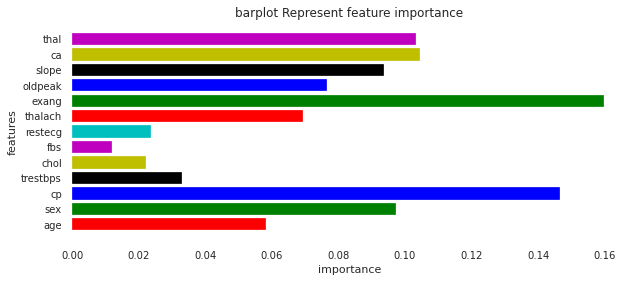

In [46]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': estimators['xgb']['mod'].feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

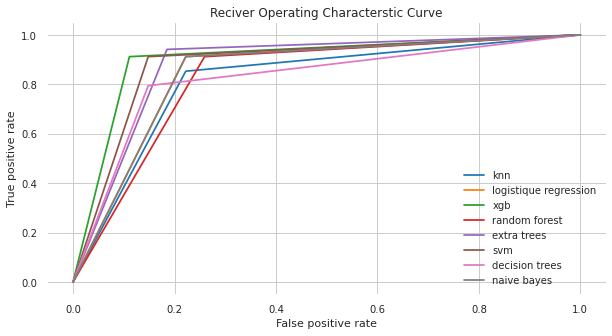

In [47]:
classification.roc_curve(pred)

# **Model Evaluation**

> Résumons dans ce qui va suivre les résultats prédictifs obtenus

In [48]:
model_ev=classification.model_eval(acc_score)
model_ev

,Model,Accuracy
0,knn,81.967213
1,logistique regression,85.245902
2,xgb,90.163934
3,random forest,83.606557
4,extra trees,88.524590
5,svm,88.524590
6,decision trees,81.967213
7,naive bayes,85.245902


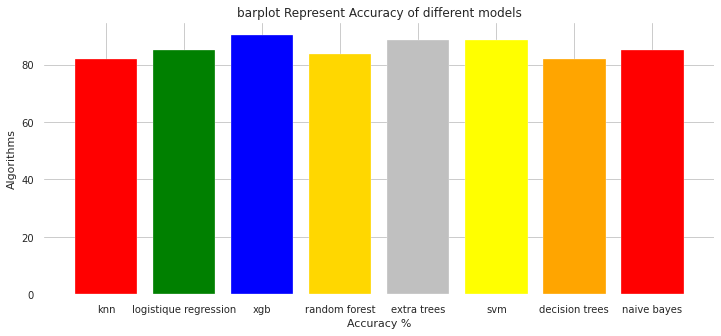

In [49]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

## **Ensembling**

> In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

### About Stacking 

> Stacking or Stacked Generalization is an ensemble machine learning algorithm. It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms. The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.The stacking ensemble is illustrated in the figure below

> <img style="float: centre;" src="https://mlfromscratch.com/content/images/2020/01/image-2.png" width="400px"/>

> Prenons  dans ce cas nos trois meilleures modèles de prédiction qui sont :
        
 >>* **Extreme gradient boosting**

 >>*  **K Nearest Neighbors**
        
 >>*  **Support Vector Machines (SVM)**

In [50]:
#Initialisons d'abords nos modèles
knn=estimators['knn']['mod']
xgb=estimators['xgb']['mod']
svc=estimators['svm']['mod']

In [51]:
 scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= knn,random_state=50)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[25  2]
 [ 3 31]]


Accuracy of StackingCVClassifier: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



# **Conclusion**

1) Extreme Gradient Boost gives the best Accuracy compared to other models.

2) Exercise induced angina,Chest pain is major symptoms of heart attack.

3) Ensembling technique increase the accuracy of the model.